In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tata.csv')

In [4]:
training_set = data.iloc[:, 1: 2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [5]:
data.head(4)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.5,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.0,236.25,236.10,2349368,5503.90


In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
x_train = []
y_train = []
for i in range(60, 2035):
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 22s 133ms/step - loss: 0.0103
Epoch 2/100
62/62 [==============================] - 8s 131ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0024
Epoch 10/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 8s 134ms/step - loss: 0.0018
Epoch 13/100

62/62 [==============================] - 8s 133ms/step - loss: 6.1299e-04
Epoch 98/100
62/62 [==============================] - 8s 133ms/step - loss: 6.7552e-04
Epoch 99/100
62/62 [==============================] - 8s 132ms/step - loss: 6.4414e-04
Epoch 100/100
62/62 [==============================] - 8s 133ms/step - loss: 7.1993e-04


In [11]:
data_test = pd.read_csv('tata.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [12]:
data_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_21088\3439170556.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = data_total[len(data_total) - len(data_test) - 60:].values


In [13]:
x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


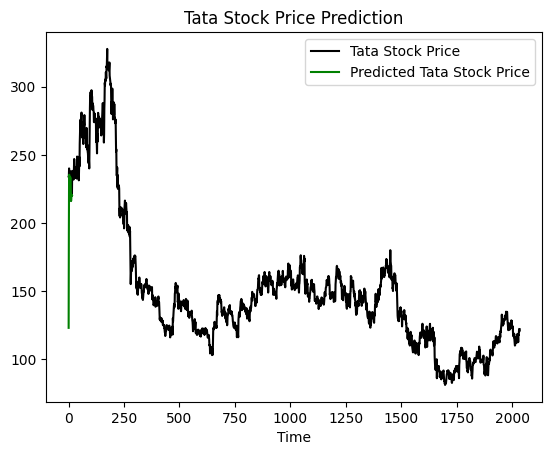

In [14]:
plt.plot(real_stock_price, color = 'black', label = 'Tata Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tata Stock Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel = ('Tata Stock Price')
plt.legend()
plt.show()